In [ ]:
# Core Libraries.
import pandas as pd
import numpy as np
import warnings
import datetime as dt

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Precison Handling settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
#Reading data set
data_og = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
data_og.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [ ]:
data = data_og[["ID","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Kidhome","Teenhome"]]
data.head(3)

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1
2,4141,26,426,49,127,111,21,42,1,8,2,10,0,0


In [ ]:
#Exploring data frame, identifying Potential Errors and understanding the datatypes
pd.set_option('display.max_columns', None)
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())

data_overview(data)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:2240
Columns:14
------------------------------------------------------------ HEAD -----------------------------------------------------------
     ID  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  5524       58       635         88              546              172                88            88                  3                8   
1  2174       38        11          1                6                2                 1             6                  2                1   
2  4141       26       426         49              127              111                21            42                  1                8   
3  6182       26        11          4               20               10                 3             5                  2                2   
4  5324     

In [ ]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
#extracting only necessary attributes for modelling
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
data.head()

,ID,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome,Children,Is_Parent
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1,2,1
2,4141,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0
3,6182,26,11,4,20,10,3,5,2,2,0,4,1,0,1,1
4,5324,94,173,43,118,46,27,15,5,5,3,6,1,0,1,1


> **Featuring Frequency and Monatery**

In [ ]:
# Frequency measures the purchase frequency within a specified period.
data["Frequency"] = data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]
# Monetary measures the total monetary expenditure within a specified period.
data["Monatery"] = data["Wines"]+data["Fruits"]+ data["Meat"]+ data["Fish"]+ data["Sweets"]+ data["Gold"] #Total amt spent


In [ ]:
data.head(3)

,ID,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome,Children,Is_Parent,Frequency,Monatery
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,25,1617
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1,2,1,6,27
2,4141,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0,21,776


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

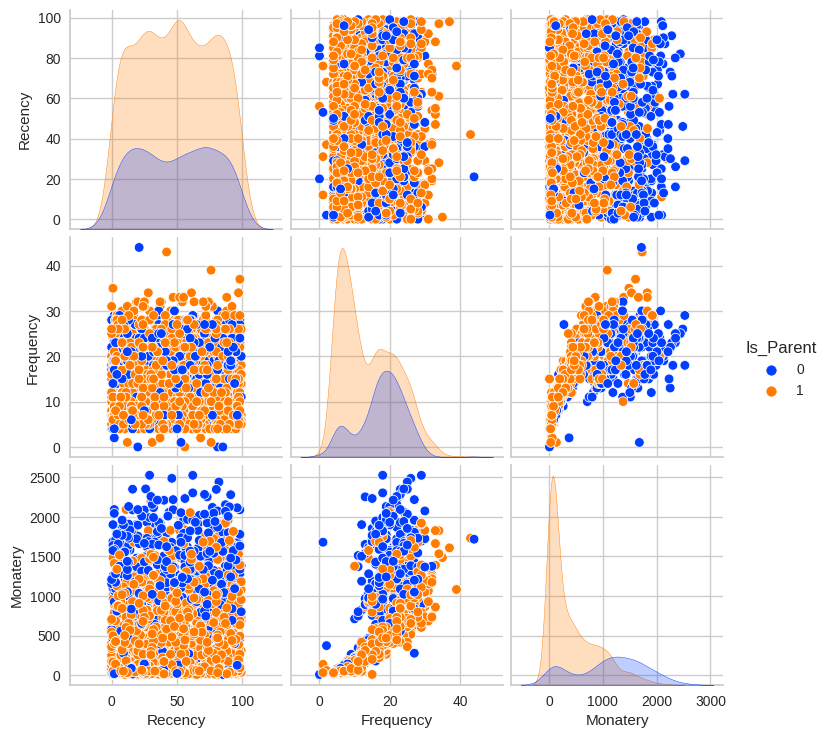

In [ ]:
#lets check for outliers.
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[[ "Recency","Frequency","Monatery", "Is_Parent"]], hue= "Is_Parent",palette= "bright")

Data frame looks good without any discrepancy.

In [ ]:
rfm = data[["Recency","Frequency","Monatery"]]
rfm.head()

,Recency,Frequency,Monatery
0,58,25,1617
1,38,6,27
2,26,21,776
3,26,8,53
4,94,19,422


In [ ]:
#scaling data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled = pd.DataFrame(rfm_scaled)
#Renaming the columns
rfm_scaled.columns = ["recency","frequency","monatery"]
rfm_scaled.head()

,recency,frequency,monatery
0,0.307,1.321,1.679
1,-0.384,-1.155,-0.961
2,-0.798,0.800,0.283
3,-0.798,-0.894,-0.918
4,1.550,0.539,-0.305


> **We need to find optimal value of K for modeling i.e., number of groups to be obtined. It can be acheived by Elbow method.**

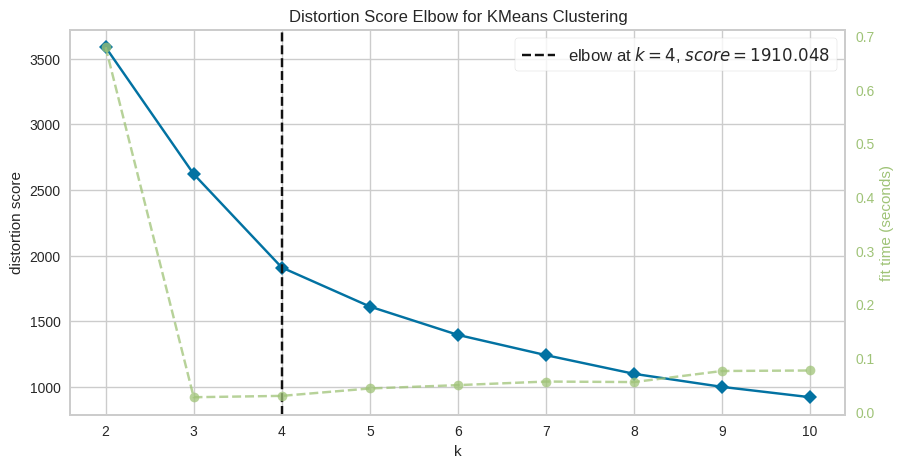

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Random initailazing of k=10 to plot graph and find Elbow
plt.figure(figsize=(10,5))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(rfm_scaled)
Elbow_M.show()

> Therefore K = 4

In [ ]:
#KMeans Clustering
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
rfm_scaled["clusters"]=kmeans.labels_
rfm["clusters"]=kmeans.labels_
data["clusters"] = kmeans.labels_
rfm_scaled.head()

,recency,frequency,monatery,clusters
0,0.307,1.321,1.679,3
1,-0.384,-1.155,-0.961,2
2,-0.798,0.800,0.283,1
3,-0.798,-0.894,-0.918,2
4,1.550,0.539,-0.305,3


In [ ]:
#centriods
kmeans.cluster_centers_

array([[ 0.89002869, -0.7680078 , -0.77604328],
       [-0.88597555,  0.919537  ,  0.86414913],
       [-0.84775544, -0.81160414, -0.79345128],
       [ 0.83547208,  0.86374362,  0.90440975]])

<function matplotlib.pyplot.show(close=None, block=None)>

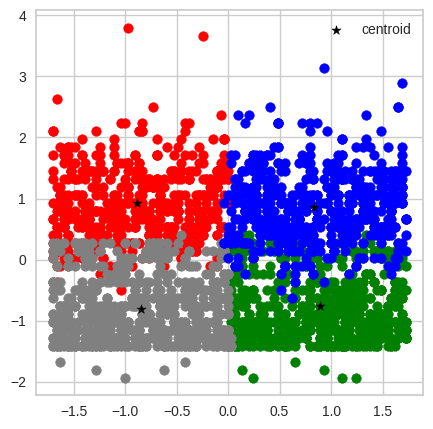

In [ ]:
# grouping the data in accorandance with each cluster seperately
one = rfm_scaled[rfm_scaled["clusters"]==0]
two = rfm_scaled[rfm_scaled["clusters"]==1]
three = rfm_scaled[rfm_scaled["clusters"]==2]
four = rfm_scaled[rfm_scaled["clusters"]==3]

#Lets check the quality of clustering in the data set
plt.figure(figsize=(5,5))
plt.scatter(one["recency"],one["frequency"],color='green')
plt.scatter(two["recency"],two["frequency"],color='red')
plt.scatter(three["recency"],three["frequency"],color='grey')
plt.scatter(four["recency"],four["frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="*",label="centroid")
plt.legend()
plt.show

> Data had been equally
 divided and grouped w.r.t its nearest centroid.

Text(0.5, 1.0, 'Recency v/s Clusters')

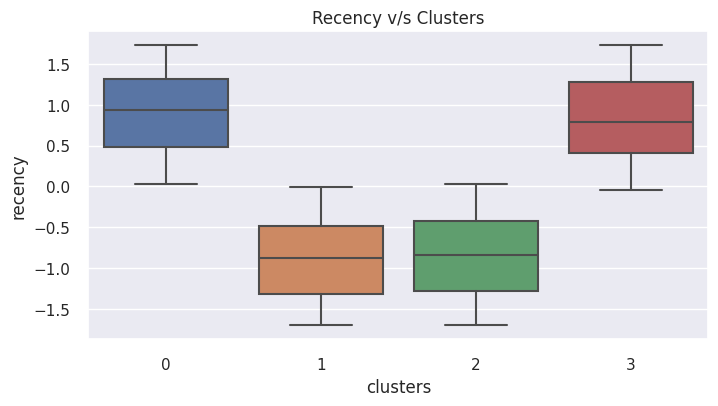

In [ ]:
# Lets see the recency of each clusters
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="clusters",y="recency",data=rfm_scaled).set_title("Recency v/s Clusters")

Text(0.5, 1.0, 'Frequency v/s Clusters')

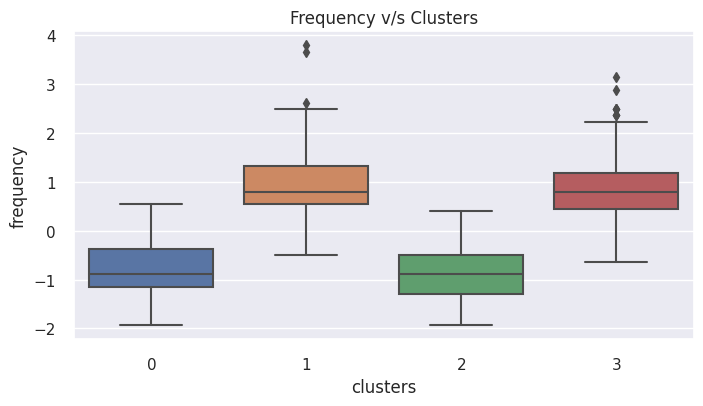

In [ ]:
# Lets see the frequency of each clusters
sns.boxplot(x="clusters",y="frequency",data=rfm_scaled).set_title("Frequency v/s Clusters")

Text(0.5, 1.0, 'Monatery v/s Clusters')

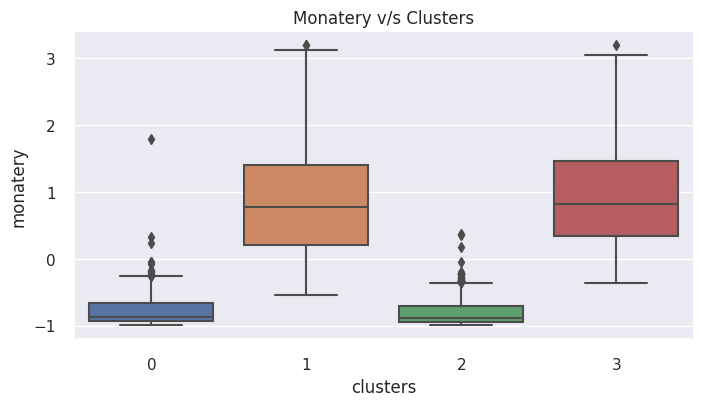

In [ ]:
# Lets see the monatery of each clusters
sns.boxplot(x="clusters",y="monatery",data=rfm_scaled).set_title("Monatery v/s Clusters")

In [ ]:
# Lets create bins and assign scores for rfm value
bins1 = np.linspace(rfm["Recency"].min(),rfm["Recency"].max(),6)
rfm["r_score"] = pd.cut(rfm["Recency"],bins1,labels=[5,4,3,2,1],include_lowest=True)

bins2 = np.linspace(rfm["Frequency"].min(),rfm["Frequency"].max(),6)
rfm["f_score"] = pd.cut(rfm["Frequency"],bins2,labels=[1,2,3,4,5],include_lowest=True)

bins3 = np.linspace(rfm["Monatery"].min(),rfm["Monatery"].max(),6)
rfm["m_score"] = pd.cut(rfm["Monatery"],bins3,labels=[1,2,3,4,5],include_lowest=True)

rfm["RFM SCORE"] = rfm["r_score"].astype(str) + rfm["f_score"].astype(str)
rfm.head()

,Recency,Frequency,Monatery,clusters,r_score,f_score,m_score,RFM SCORE
0,58,25,1617,3,3,3,4,33
1,38,6,27,2,4,1,1,41
2,26,21,776,1,4,3,2,43
3,26,8,53,2,4,1,1,41
4,94,19,422,3,1,3,1,13


In [ ]:
# creating dictionary to name each segments
dict_seg = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM SCORE'].replace(dict_seg, regex = True)
data['segment'] = rfm['RFM SCORE'].replace(dict_seg, regex = True)
data.head()

,ID,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome,Children,Is_Parent,Frequency,Monatery,clusters,segment
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,25,1617,3,need_attention
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1,2,1,6,27,2,promising
2,4141,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0,21,776,1,potential_loyalists
3,6182,26,11,4,20,10,3,5,2,2,0,4,1,0,1,1,8,53,2,promising
4,5324,94,173,43,118,46,27,15,5,5,3,6,1,0,1,1,19,422,3,at_Risk
